<a href="https://colab.research.google.com/github/SavageGinny/AI-python/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_6_(%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 6. Обучение без учителя

## **Цель занятия:**
Изучить методы обучения без учителя, познакомиться с алгоритмами кластеризации, понять их применение и реализовать модели кластеризации с использованием различных алгоритмов.

## **Задание состоит из следующих частей:**
1. Определение обучения без учителя
2. Разбор алгоритмов DBSSCAN, K-means
3. Метрики качества кластеризации
4. Пример полезных задач, которые решает кластеризация

**P.S.** Некоторые вещи (например PCA, обработка текстовых данных) мы пройдем чуть позже.

## Задачи для домашки ⏰

1. Преобразовать датасет
2. Построить кластеры
3. Описать результат полученных кластеров (для K-Means и DBSSCAN)
4. Объяснить метрики качества

**По желанию**

1. Спарсить данные по статьям (например lenta.ru или naked-science.ru)
2. Преобразовать текста статьи (по принципу описанному в последнем пункте)
3. Оценить метрики качества, провести аналитику кластеров (можно не максимально подробно, если получилось слишком много кластеров)

## Предобработка (все по классике)

Открываем датасет, преобразуем данные, идем дальше

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/pokemon.csv')


In [41]:
df

,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,1,0,0
2,0,0,2,2,2,2,2,2,2,0,0
3,0,0,3,2,3,3,3,3,2,0,0
4,1,-1,4,3,4,4,4,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
795,11,4,63,9,3,58,2,53,10,5,1
796,11,4,95,9,58,22,64,26,22,5,1
797,10,15,63,2,39,18,65,27,9,5,1
798,10,11,80,2,58,18,32,27,2,5,1


### Преобразование категориальных фич

In [4]:

df = df.drop(['#', 'Name'], axis=1)
df = df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2"})

for column in df.columns:
    df[column], _ = pd.factorize(df[column])

In [48]:
df

,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,1,0,0
2,0,0,2,2,2,2,2,2,2,0,0
3,0,0,3,2,3,3,3,3,2,0,0
4,1,-1,4,3,4,4,4,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
795,11,4,63,9,3,58,2,53,10,5,1
796,11,4,95,9,58,22,64,26,22,5,1
797,10,15,63,2,39,18,65,27,9,5,1
798,10,11,80,2,58,18,32,27,2,5,1


### Преобразование непрерывных фич

In [49]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [50]:
df

,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.055556,0.005025,0.010753,0.009091,0.009804,0.009615,0.010989,0.009346,0.0,0.0
2,0.000000,0.055556,0.010050,0.021505,0.018182,0.019608,0.019231,0.021978,0.018692,0.0,0.0
3,0.000000,0.055556,0.015075,0.021505,0.027273,0.029412,0.028846,0.032967,0.018692,0.0,0.0
4,0.058824,0.000000,0.020101,0.032258,0.036364,0.039216,0.038462,0.043956,0.028037,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
795,0.647059,0.277778,0.316583,0.096774,0.027273,0.568627,0.019231,0.582418,0.093458,1.0,1.0
796,0.647059,0.277778,0.477387,0.096774,0.527273,0.215686,0.615385,0.285714,0.205607,1.0,1.0
797,0.588235,0.888889,0.316583,0.021505,0.354545,0.176471,0.625000,0.296703,0.084112,1.0,1.0
798,0.588235,0.666667,0.402010,0.021505,0.527273,0.176471,0.307692,0.296703,0.018692,1.0,1.0


## О кластеризации и задачи обучения без учителя

#### Обучение с учителем

Представьте, что у вас есть список задач с правильными ответами. Например, вам дали примеры: «Это яблоко», «Это груша».

Задача — научиться отличать их, чтобы потом, когда вы увидите новый фрукт, вы смогли правильно его назвать. То есть у вас есть **учитель** — тот, кто заранее всё объяснил и дал правильные ответы.  

#### Обучение без учителя

А теперь представьте, что вам дали корзину фруктов, но никто не сказал, как они называются.

Задача — посмотреть на фрукты и найти, что у них общего, например: круглые положить в одну группу, длинные в другую. Тут вы работаете **без подсказок** и сами решаете, как группировать.  

#### Разница

- В задачах с учителем есть правильные ответы, и мы обучем алгоритм делать предсказания на основе примеров.  
- В задачах без учителя правильных ответов нет, ищем закономерности и пытаемся найти смысл группировки данные самостоятельно.

Пример:


1. **С учителем**: Мы ищем лучшее вино.  
2. **Без учителя**: Мы пытаемся объеденить вина, чтобы понять по какому принципу они объеденяются.  

## K-means

**K-means** — это алгоритм кластеризации, который делит данные на 𝑘 групп (кластеров). Основная идея: найти центры кластеров так, чтобы точки внутри одного кластера были ближе друг к другу, чем к точкам из других кластеров.

1. Инициализация: выбираем 𝑘 случайных центров (центроидов).
2. Присвоение точек: каждая точка относится к ближайшему центру.
Обновление центров: пересчитываем центры кластеров как среднее всех точек в кластере.
3. Повторяем шаги 2–3, пока центры не перестанут меняться или не достигнем максимального числа итераций.

In [5]:
! pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


Добавил удаление строк, содержащие "Nan"

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):
    # Проверка данных и преобразование в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.select_dtypes(include=[np.number]).dropna().values
    elif not isinstance(X, np.ndarray):
        raise ValueError("Input data X must be a pandas DataFrame or numpy array.")

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])


interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

### K-means через реализацию skelarn

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 4  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")


Статистика по кластерам:

Статистика для признака 'Type_1':
             mean       std  min       max
Cluster                                   
0        0.251054  0.200641  0.0  0.823529
1        0.205400  0.159120  0.0  0.705882
2        0.703727  0.205140  0.0  1.000000
3        0.420728  0.297915  0.0  1.000000

Статистика для признака 'Type_2':
             mean       std  min       max
Cluster                                   
0        0.111976  0.178971  0.0  0.722222
1        0.200668  0.284457  0.0  1.000000
2        0.239383  0.290212  0.0  0.944444
3        0.278836  0.277241  0.0  1.000000

Статистика для признака 'Total':
             mean       std       min       max
Cluster                                        
0        0.227665  0.141460  0.000000  0.603015
1        0.447566  0.264093  0.000000  0.979899
2        0.325081  0.166749  0.005025  0.884422
3        0.523379  0.307147  0.010050  1.000000

Статистика для признака 'HP':
             mean       std  min    

#### **Анализ кластеров**



После кластеризации с помощью K-means (k=4) получилось выделить 4 группы покемонов с различными характеристиками. Вот основные наблюдения:

1. **Типы покемонов (Type_1 и Type_2):**
  Ничего не могу сказать - я преобразовал их в числа, так как онализировать каждый тип... Ну, не смогу. Там я ничего у них понять не смог

2. **Общая сила (Total)**:
  - **Кластер 3** — самый высокий средний показатель Total (≈ 0.523), что говорит о мощных покемонах. Халк крушить, мб там и пикачу завелся
  - **Кластер 0** — минимальный Total (≈ 0.228), здесь слабые покемоны. Скорее на домашних питомцев походят больше, чем на боевых едениц.
  - **Остальные (1 и 2)** занимают промежуточные позиции (Total ≈ 0.448 и 0.325). Такая база, что будут использоваться повсеместно на протяжении долгого времени игры

3. **Легендарные покемоны:**
  - **Кластер 2** — больше всего легендарных покемонов (Legendary ≈ 0.304).
  - **Кластер 1** — легендарных нет (Legendary = 0.0).
  - **В кластерах 0 и 3** их совсем мало (Legendary ≈ 0.006 и 0.048) Скорее всего их туда разбросало лишь бы бросить. А может и быть, что там у нас уникумы среди легендарок.

4. **Атака (Attack):**
  - В кластере 3 самые высокие значения (mean ≈ 0.416).
  - В кластере 0 — минимальные (mean ≈ 0.222).
5. **Защита (Defense):**
  - Кластер 3 снова лидер (≈ 0.598),
  - Кластер 0 — минимальная защита (≈ 0.208).
6. **Скорость (Speed):**
  - Самые быстрые покемоны в кластере 3 (mean ≈ 0.549), самые медленные — в кластере 0 (mean ≈ 0.146).

**Коэффициент силуэта для \( k=3 \): 0.3420**

Коэффициент силуэта для k=4 получился 0.1779 — не супер высокий, но и не провальный. Это значит, что кластеры немного пересекаются, но в целом их можно отличить. Хотя, учитывая, что самые бронерованные и самые быстрые и самые сильные по атаке - все в 3 кластере, то значения... не очень. По логике вещей их должно было раскидать в разные кластеры, но, учитыва, что их разбросало как в Total, то немного становится яснее - просто у 3 кластера попались самые самые по разным признакам... Относительно "самые". Были бы прям сильные, то ср.знач были бы в районе 0.7, как мне кажется



- **Диапазон значений:** от -1 до 1.
  - **Близкие к 1:** Хорошая кластеризация; объекты внутри кластеров схожи, кластеры хорошо разделены.
  - **Около 0:** Кластеры пересекаются; объекты находятся на границах кластеров.
  - **Отрицательные значения:** Плохая кластеризация; объекты могут быть отнесены к неправильным кластерам.

**Интерпретация полученного значения:**

- **0.1779** — это положительное значение, указывающее на удовлетворительное качество кластеризации.
- Кластеры достаточно хорошо разделены, но есть пересечение между ними.

Кластеризация позволила выделить группы покемонов, отличающиеся по типу, атаке, защите и тд.

### DBSSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности точек в пространстве.

Параметры алгоритма:

- **Epsilon (eps)**: радиус окрестности точки.
- **Min_samples**: минимальное количество точек в eps-окрестности для того, чтобы точка считалась ядром кластера.

Классификация точек:

- **Core point (ядро)**: если в eps-окрестности точки находится не менее min_samples точек, то она является ядром.
- **Border point (граничная точка)**: точка, которая находится в eps-окрестности ядра, но сама не является ядром.
- **Noise point (шум)**: точка, которая не является ни ядром, ни граничной точкой. (**входит в кластер -1**)

Точки, которые связаны по плотности (через ядра и их eps-окрестности), объединяются в один кластер.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])


Output()

### DBSSCAN через sklearn

Количество кластеров: 0
Статистика по кластерам:

Статистика для признака 'Type_1':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Type_2':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Total':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'HP':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Attack':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Defense':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Sp. Atk':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Sp. Def':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Speed':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Generation':
Empty DataFrame
Columns:

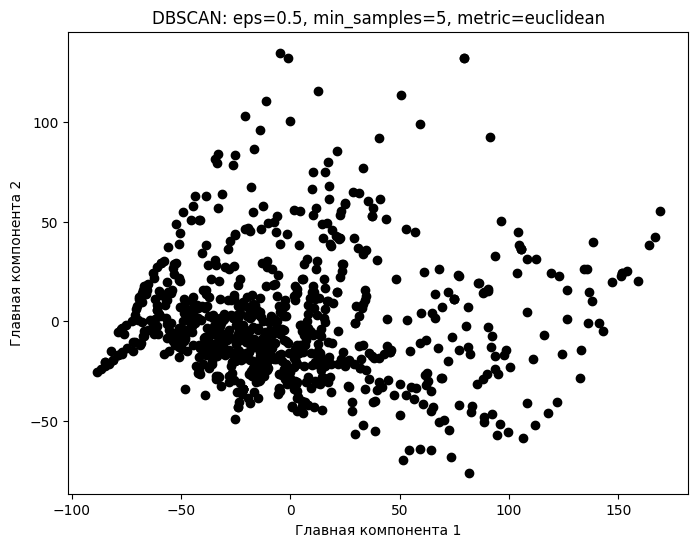

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.5
min_samples = 5
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


#### **Анализ кластеров**

После применения алгоритма DBSCAN мы получили **4 кластера**, между которыми наблюдаются существенные различия по некоторым признакам. Рассмотрим три наиболее значимых признака:

1. Общая сила (Total):
  Кластер 0:
    Самое низкое среднее значение Total (≈ 0.28), что говорит о слабых покемонах. Просто "slave"
  Кластер 1:
    Total ≈ 0.38, значение выше среднего, но не максимальное. Просто база. Нехватает 301$
  Кластер 2:
    Самое высокое среднее значение Total (≈ 0.72), этот кластер явно содержит гигачадов в мире покемонов.
  Кластер 3:
    Total ≈ 0.39, близко к кластеру 1, что указывает на высокую мощь, но не настолько выраженную, как в кластере 2. Не хватает 300$ до состояния "Босс качалки".

2. **Аттака и защита**
  Кластер 0:
    Attack ≈ 0.25, Defense ≈ 0.23. Обычные, сбалансированные характеристики. Не туда, ни сюда. Так ещё и слабы
  Кластер 1:
    Значения схожи: Attack ≈ 0.25, Defense ≈ 0.32. Эти покемоны немного лучше защищены, чем атакуют. Броневики, но не достаточно.
  Кластер 2:
    Attack ≈ 0.79 — самые высокие показатели атаки среди всех кластеров, однако защита (Defense ≈ 0.24) остается на уровне среднего. Стратегия "Бахни чем-нибудь убойным, да не парься, вс-равно там один пепел"
  Кластер 3:
    Самое высокое значение защиты (Defense ≈ 0.83), что выделяет данный кластер как содержащий мощных защитников. Атака ниже — Attack ≈ 0.29. Настоящий страх 2 кластера. Пока они уверенны в своей победе, так как сделали бабах на вражеского покемона, он берёт и тыкает его по плечу, аки песец пушистый.

3. **Скорость**
  Кластер 0:
    Самое низкое среднее значение скорости — Speed ≈ 0.16.
  Кластер 1:
    Увеличенная скорость — Speed ≈ 0.23, типично для легендарных покемонов.
  Кластер 2:
    Высокое значение скорости — Speed ≈ 0.67, что делает покемонов этого кластера быстрыми и эффективными в бою. ОЧень быстры и бьют на опережение. Но тут мы смотрим в кластер 3...
  Кластер 3:
    Максимальное значение скорости — Speed ≈ 0.70, эти покемоны явно выделяются как самые быстрые. Помните про тыкание по плечу? А вот не просто так они над врагом издеваются, он от них не убежит.
    МУАХ-ХА-ХА-ХА-ХА

4. **Легендарность**
  Тут что-то странное. Только в 1 кластере есть легендарные покемоны. Хотя 1 кластер не выделяется чем-то выдающимся в виде атаки, скорости и защиты. Скорее всего, такие показатели из-за разброса - каждый покемон оригинален, особенно легендарные. Приходим к выводу - 0 кластер - просто базовые покемоны, 1 - легендарные, 2 - атакующие, 3 - броневики

**Коэффициент силуэта для DBSCAN:** 0.3049

**Общее заключение:**

Алгоритм DBSCAN гораздо более успешно разделил Покемонов. Более наглядно. Раздели я на большее кол-во кластеров - разделило бы более качественно. Но это бы, потом бы, сказалось на обучении, просто потому, что датасет не такой большой и  обучающая выборка стала слишком малой

### Метрики качества кластеризации

**Дополнительные метрики для оценки качества кластеризации**

Кроме коэффициента силуэта, существуют и другие метрики, которые помогают оценить качество кластеризации. Вот некоторые из них:

1. **Индекс Калински-Харабаза (Calinski-Harabasz Index):**
   - **Описание:** Измеряет отношение между разбросом между кластерами и разбросом внутри кластеров.
   - **Диапазон значений:** От 0 до бесконечности.
   - **Интерпретация:** Чем ближе к бесконечности больше, тем лучше раздленеие между кластерами

2. **Индекс Дэвиса-Болдина (Davies-Bouldin Index):**
   - **Описание:** Оценивает среднее "сходство" между каждым кластером и наиболее похожим на него другим кластером. Сходство основано на расстоянии между кластерами и их размером.
   - **Диапазон значений:** От 0 до бесконечности.
   - **Интерпретация:** Чем ближе к 0, тем лучшее разделение между кластерами.

3. **Коэффициент силуэта (Silhouette Score):**

    - **Описание:** Измеряет, насколько объект похож на свой кластер по сравнению с другими кластерами.
    - **Диапазон значений:** От -1 до 1.
    - **Интерпретация:** Значения, близкие к 1, указывают на хорошую кластеризацию. Значения около 0 означают, что кластеры перекрываются. Отрицательные значения указывают на возможные ошибки в кластеризации.

In [13]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN
# Кластеризация K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 260.4735
Индекс Дэвиса-Болдина для K-means: 1.7736
Коэффициент силуэта для K-means: 0.1910


In [26]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 8
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Индекс Калински-Харабаза для DBSCAN: 909.7963
Индекс Дэвиса-Болдина для DBSCAN: 0.0893
Коэффициент силуэта для DBSCAN: 0.9228


#### Визуальный пример

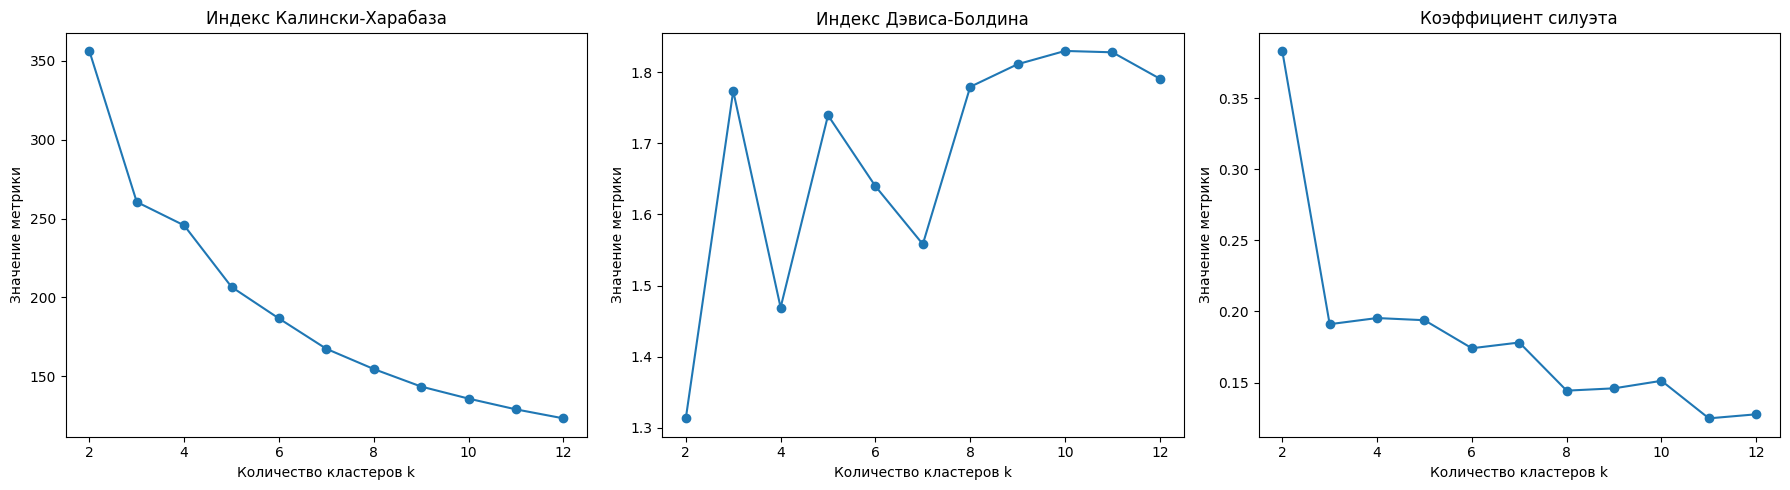

In [27]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()


# Пример обработки текстовых данных

In [28]:
pip install nltk pymorphy2 scikit-learn


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f3f60b37edd02af8b7c37b5efc2aa5fbccf8ea03594d91e1147901f61f3f9a0a
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [36]:
pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.3 MB/s eta 0:00:00


In [37]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Инициализация текстовых анализаторов

In [38]:
from pymystem3 import Mystem
from nltk.corpus import stopwords
import nltk

# Загружаем стоп-слова
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Инициализируем лемматизатор
mystem = Mystem()

# Чтение данных из файла
# Загрузил фанфик по Наруто, что я написал в 15 :)
# Прикольное и кринжовое чтиво
with open('/content/Ne-standartnyj-gejmer-nacalo-puti.txt', 'r', encoding='utf-8') as f:
    content = f.read()

# Разделяем данные на статьи
articles_raw = content.split('=====')

# Извлекаем заголовки и тексты статей
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 6:
        # Извлекаем заголовок и текст статьи
        title = lines[4]
        text = ' '.join(lines[5:])
        titles.append(title)
        texts.append(text)

# Лемматизация текста и удаление стоп-слов
processed_texts = []
for text in texts:
    lemmatized = ''.join(mystem.lemmatize(text))  # Лемматизируем текст
    # Убираем стоп-слова и лишние пробелы
    filtered_text = ' '.join(
        word for word in lemmatized.split() if word not in russian_stopwords
    )
    processed_texts.append(filtered_text)

# Вывод обработанных заголовков и текстов
for title, text in zip(titles, processed_texts):
    print(f"Заголовок: {title}")
    print(f"Текст: {text}\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Заголовок: 
Текст: направленность: гета автор: кайфовать лис (https://ficbook.net/authors/4328628) фэнд: Naruto,The Gamer(кроссовер) пэйринг персонаж: наруто узумак/хинат хьюг, саске учиха/сакура харуно/карин узумак, какаши хатак/анко митараша, итачи учиха/изумлять учиха, джирайя, гай майто, рок ли, данзо шимура, хирузный сарутоби, цунада сенджа, канкуро, гаар, ино яманака, курам, чоджи акимич рейтинг: R размер: 52 страница кол-во часть: 12 статус: завершать метка: кроссовер, приключение, геймлить, упоминание самоубийство, политический интрига, анальный секс, параллельный мир, альтернативный мировой история, сверхспособность, убийство, кровь / травма, засос / укус, боевой искусство, повествование несколько лицо, потеря девственность, попаданец: чужой тело, регенерация, оос, насилие, нецензурный лексика, групповой секс, мэри сью (марти стье), Underage, юмор, фэнтези, фантастика, экшн, повествование первый лицо, попаданчество, телепортация, управление стихия, элемент драма, элемент детек

In [39]:
texts[:2]

['Направленность: Гет     Автор: Кайфующий Лис (https://ficbook.net/authors/4328628)    Фэндом: Naruto,The Gamer(кроссовер)     Пэйринг и персонажи: Наруто Узумаки/Хината Хьюга, Саске Учиха/Сакура Харуно/Карин Узумаки, Какаши Хатаке/Анко Митараши, Итачи Учиха/Изуми Учиха, Джирайя, Гай Майто, Рок Ли, Данзо Шимура, Хирузен Сарутоби, Цунаде Сенджу, Канкуро, Гаара, Ино Яманака, Курама, Чоджи Акимичи Рейтинг: R  Размер:  52 страницы Кол-во частей: 12 Статус:     завершён Метки: Кроссовер, Приключения, Геймлит, Упоминания самоубийства, Политические интриги, Анальный секс, Параллельные миры, Альтернативная мировая история, Сверхспособности, Убийства, Кровь / Травмы, Засосы / Укусы, Боевые искусства, Повествование от нескольких лиц, Потеря девственности, Попаданцы: В чужом теле, Регенерация, ООС, Насилие, Нецензурная лексика, Групповой секс, Мэри Сью (Марти Стью), Underage, Юмор, Фэнтези, Фантастика, Экшн, Повествование от первого лица, Попаданчество, Телепортация, Управление стихиями, Элемент

#### Предварительная обработка текстовых данных

1. преобразуем в lowercase
2. оставляем только слова
3. токенизируем текста
4. преобразуем слова в начальную форму

In [40]:
russian_stopwords

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [42]:
# Функция предобработки текста
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию, цифры и специальные символы
    text = re.sub(r'[^а-яё\s]', '', text)
    # Лемматизация текста
    lemmatized = mystem.lemmatize(text)
    # Удаление стоп-слов
    filtered_words = [word for word in lemmatized if word.strip() and word not in russian_stopwords]
    return ' '.join(filtered_words)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]

# Вывод предобработанных текстов
for i, text in enumerate(texts_preprocessed):
    print(f"Текст {i + 1}:\n{text}\n")


Текст 1:
направленность гета автор кайфовать лис фэнд кроссовер пэйринг персонаж наруто узумакихинат хьюг саске учихасакура харунокарина узумак какаши хатакеанко митараша итачи учихаизумлять учиха джирайя гай майто рок данзо шимура хирузный сарутоби цунада сенджа канкурый гаар ино яманака курам чоджи акимич рейтинг размер страница колво часть статус завершать метка кроссовер приключение геймлить упоминание самоубийство политический интрига анальный секс параллельный мир альтернативный мировой история сверхспособность убийство кровь травма засос укус боевой искусство повествование несколько лицо потеря девственность попаданец чужой тело регенерация оос насилие нецензурный лексика групповой секс мэри сью марти стье юмор фэнтези фантастика экшн повествование первый лицо попаданчество телепортация управление стихия элемент драма элемент детектив элемент романтика описание попаданец решать говорить свой история несколько личность примечание лайков юха продолжение приключение наш гг публикац

In [43]:
texts_preprocessed[:2]

['направленность гета автор кайфовать лис фэнд кроссовер пэйринг персонаж наруто узумакихинат хьюг саске учихасакура харунокарина узумак какаши хатакеанко митараша итачи учихаизумлять учиха джирайя гай майто рок данзо шимура хирузный сарутоби цунада сенджа канкурый гаар ино яманака курам чоджи акимич рейтинг размер страница колво часть статус завершать метка кроссовер приключение геймлить упоминание самоубийство политический интрига анальный секс параллельный мир альтернативный мировой история сверхспособность убийство кровь травма засос укус боевой искусство повествование несколько лицо потеря девственность попаданец чужой тело регенерация оос насилие нецензурный лексика групповой секс мэри сью марти стье юмор фэнтези фантастика экшн повествование первый лицо попаданчество телепортация управление стихия элемент драма элемент детектив элемент романтика описание попаданец решать говорить свой история несколько личность примечание лайков юха продолжение приключение наш гг публикация ресу

#### Преобразуем в векторный вид

In [44]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)


In [45]:
# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)


In [46]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')


Количество кластеров: 0


In [47]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [48]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}<extra></extra>'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()


Если что... Я забыл про мат внутри чтива. Простите...